<font size="10">Mini Project - 2 </font>

   <font size="7">   IST 652   </font>


<font size="5"> Loading and Cleaning data </font>

In [1]:
import json #using the import json to inport data from a json file
import pandas as pd
# importing necessary libraries

In [2]:
# function to load a JSON file from a file path
def load_json(file_path):   # opening the specified file in read mode
    with open(file_path, 'r') as file:   # parsing the JSON data
        return json.load(file)

In [3]:
# loading the datasets from the file paths.
path_to_first_json_file = '2019_Womens_WorldCup.json'
path_to_second_json_file = '2018_Mens_WorldCup.json'

first_dataset = load_json(path_to_first_json_file)
second_dataset = load_json(path_to_second_json_file)

In [4]:
women_wc = pd.DataFrame(first_dataset)
men_wc = pd.DataFrame(second_dataset)
# converting the loaded data into Pandas DataFrames

In [5]:
print(women_wc.head())
print(men_wc.head())
# displaying the first few rows of each DataFrame to get an overview of the data

   match_id  match_date      kick_off  \
0     68311  2019-06-18  21:00:00.000   
1     68357  2019-06-22  21:00:00.000   
2     22933  2019-06-09  13:00:00.000   
3     22940  2019-06-10  18:00:00.000   
4     22943  2019-06-11  21:00:00.000   

                                         competition  \
0  {'competition_id': 72, 'country_name': 'Intern...   
1  {'competition_id': 72, 'country_name': 'Intern...   
2  {'competition_id': 72, 'country_name': 'Intern...   
3  {'competition_id': 72, 'country_name': 'Intern...   
4  {'competition_id': 72, 'country_name': 'Intern...   

                                     season  \
0  {'season_id': 30, 'season_name': '2019'}   
1  {'season_id': 30, 'season_name': '2019'}   
2  {'season_id': 30, 'season_name': '2019'}   
3  {'season_id': 30, 'season_name': '2019'}   
4  {'season_id': 30, 'season_name': '2019'}   

                                           home_team  \
0  {'home_team_id': 1212, 'home_team_name': 'Jama...   
1  {'home_team_id': 8

In [6]:
women_wc_flat =  pd.json_normalize(women_wc.to_dict(orient='records'))
men_wc_flat =pd.json_normalize(men_wc.to_dict(orient='records'))
#flattened the dataframe and converted them into a list of dictionaries.

In [7]:
print(women_wc_flat.head())
print(men_wc_flat.head())
# displaying the first few rows of each flattened dataFrame

   match_id  match_date      kick_off  home_score  away_score match_status  \
0     68311  2019-06-18  21:00:00.000           1           4    available   
1     68357  2019-06-22  21:00:00.000           1           1    available   
2     22933  2019-06-09  13:00:00.000           1           2    available   
3     22940  2019-06-10  18:00:00.000           0           0    available   
4     22943  2019-06-11  21:00:00.000          13           0    available   

  match_status_360      last_updated         last_updated_360  match_week  \
0        scheduled  2020-07-29T05:00  2021-06-13T16:17:31.694           3   
1        scheduled  2020-07-29T05:00  2021-06-13T16:17:31.694           4   
2        scheduled  2020-07-29T05:00  2021-06-13T16:17:31.694           1   
3        scheduled  2020-07-29T05:00  2021-06-13T16:17:31.694           1   
4        scheduled  2020-07-29T05:00  2021-06-13T16:17:31.694           1   

   ...  competition_stage.name stadium.id               stadium.name

### 1.1 Average goals per game and the most common scoreline in Women WC

In [8]:
average_goals_women = (women_wc_flat['home_score'] + women_wc_flat['away_score']).mean()
# calculating the average goals per match

most_common_scoreline_women = women_wc_flat.groupby(['home_score', 'away_score']).size().idxmax()
# finding the most common scoreline

print(f"Average Goals per Match: {average_goals_women:.2f}")
print(f"Most Common Scoreline: {most_common_scoreline_women}")# printing the results


Average Goals per Match: 2.81
Most Common Scoreline: (1, 2)


### 1.2 Average goals per game and the most common scoreline in Men WC

In [9]:
average_goals_men = (men_wc_flat['home_score'] + men_wc_flat['away_score']).mean()
# calculating the average goals per match

most_common_scoreline_men = men_wc_flat.groupby(['home_score', 'away_score']).size().idxmax()
# finding the most common scoreline

print(f"Average Goals per Match: {average_goals_men:.2f}")
print(f"Most Common Scoreline: {most_common_scoreline_men}") # printing the results

Average Goals per Match: 2.64
Most Common Scoreline: (0, 1)


### OUTPUT INTO CSV

In [10]:
# creating a dataFrame
data = {
    "Category": ["Women's World Cup", "Men's World Cup"],
    "Average Goals per Match": [average_goals_women, average_goals_men],
    "Most Common Scoreline": [most_common_scoreline_women, most_common_scoreline_men]
}

summary_df = pd.DataFrame(data)

# exporting to CSV
summary_df.to_csv('Total_Goals, Common_Scoreline.csv', index=False)



### Graphing

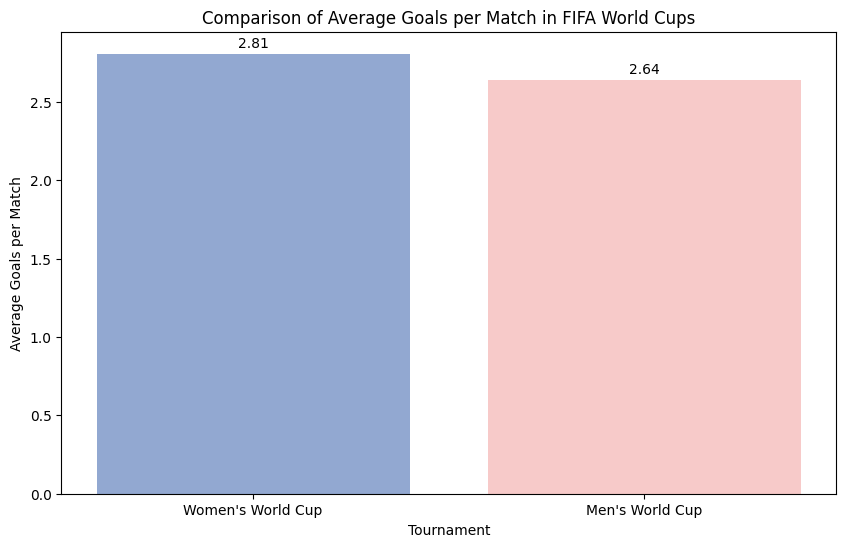

In [11]:
import matplotlib.pyplot as plt

# preparing data for plotting
categories = ['Women\'s World Cup', 'Men\'s World Cup']
average_goals = [average_goals_women, average_goals_men]

# creating the bar graph with pastel colors
plt.figure(figsize=(10, 6))
plt.bar(categories, average_goals, color=['#92a8d1', '#f7cac9'])  

# adding labels and title
plt.xlabel('Tournament')
plt.ylabel('Average Goals per Match')
plt.title('Comparison of Average Goals per Match in FIFA World Cups')

# adding the numerical values on top of the bars
for i, value in enumerate(average_goals):
    plt.text(i, value + 0.02, f'{value:.2f}', ha = 'center', va = 'bottom')

# showing the plot
plt.show()


### 2.1 Analyzing Match Scoreline Distributions in World Cup Data

In [12]:
scoreline_bins_women = women_wc_flat.groupby(['home_score', 'away_score']).size().reset_index(name='number_of_matches')
scoreline_bins_men = men_wc_flat.groupby(['home_score', 'away_score']).size().reset_index(name='number_of_matches')
# grouping matches by scoreline and counting the number of matches for each unique scoreline.

print(scoreline_bins_women)
print(scoreline_bins_men)
# Print the scoreline bins and their corresponding match counts

    home_score  away_score  number_of_matches
0            0           0                  2
1            0           1                  4
2            0           2                  5
3            0           3                  1
4            0           4                  1
5            0           5                  1
6            1           0                  6
7            1           1                  1
8            1           2                  7
9            1           4                  1
10           2           0                  4
11           2           1                  7
12           3           0                  5
13           3           1                  2
14           3           2                  1
15           3           3                  1
16           4           0                  1
17           5           1                  1
18          13           0                  1
    home_score  away_score  number_of_matches
0            0           0        

### 2.2 Categorize matches based on total goals scored

In [13]:
# categorizing matches based on total goals scored
def categorize_by_goals(row):
    total_goals = row['home_score'] + row['away_score']
    if total_goals <= 2:
        return 'Low-Scoring'
    elif 2 < total_goals <= 4:
        return 'Medium-Scoring'
    else:
        return 'High-Scoring'

women_wc_flat['scoring_category'] = women_wc_flat.apply(categorize_by_goals, axis=1)

# summary statistics for each category
summary_stats_women = women_wc_flat.groupby('scoring_category').agg({'match_id': 'count',
                                                               'home_score': 'mean',
                                                               'away_score': 'mean'}).rename(columns={'match_id': 'number_of_matches'})

print(summary_stats_women)

# categorize matches based on total goals scored
def categorize_by_goals(row):
    total_goals = row['home_score'] + row['away_score']
    if total_goals <= 2:
        return 'Low-Scoring'
    elif 2 < total_goals <= 4:
        return 'Medium-Scoring'
    else:
        return 'High-Scoring'

men_wc_flat['scoring_category'] = men_wc_flat.apply(categorize_by_goals, axis=1)

# summary statistics for each category
summary_stats_men = men_wc_flat.groupby('scoring_category').agg({'match_id': 'count',
                                                               'home_score': 'mean',
                                                               'away_score': 'mean'}).rename(columns={'match_id': 'number_of_matches'})

print(summary_stats_men)


                  number_of_matches  home_score  away_score
scoring_category                                           
High-Scoring                      6    4.166667    2.500000
Low-Scoring                      22    0.681818    0.681818
Medium-Scoring                   24    1.916667    1.250000
                  number_of_matches  home_score  away_score
scoring_category                                           
High-Scoring                      7    4.285714    1.857143
Low-Scoring                      33    0.757576    0.727273
Medium-Scoring                   24    1.500000    1.708333


### OUTPUT TO CSV

In [14]:
# adding a 'gender' column to each DF
scoreline_bins_women['Gender'] = 'Women'
scoreline_bins_men['Gender'] = 'Men'

# combining them
Scoreline_Distrubution = pd.concat([scoreline_bins_women, scoreline_bins_men], ignore_index=True)

# exporting to CSV
Scoreline_Distrubution.to_csv('Scoreline_Distrubution.csv', index=False)

# adding a 'gender' column to each DF
summary_stats_women['Gender'] = 'Women'
summary_stats_men['Gender'] = 'Men'

# combining them
Categorized_Goals = pd.concat([summary_stats_women, summary_stats_men], ignore_index=True)

# exporting to CSV
Categorized_Goals.to_csv('Categorized_Goals.csv', index=False)


### Graphing

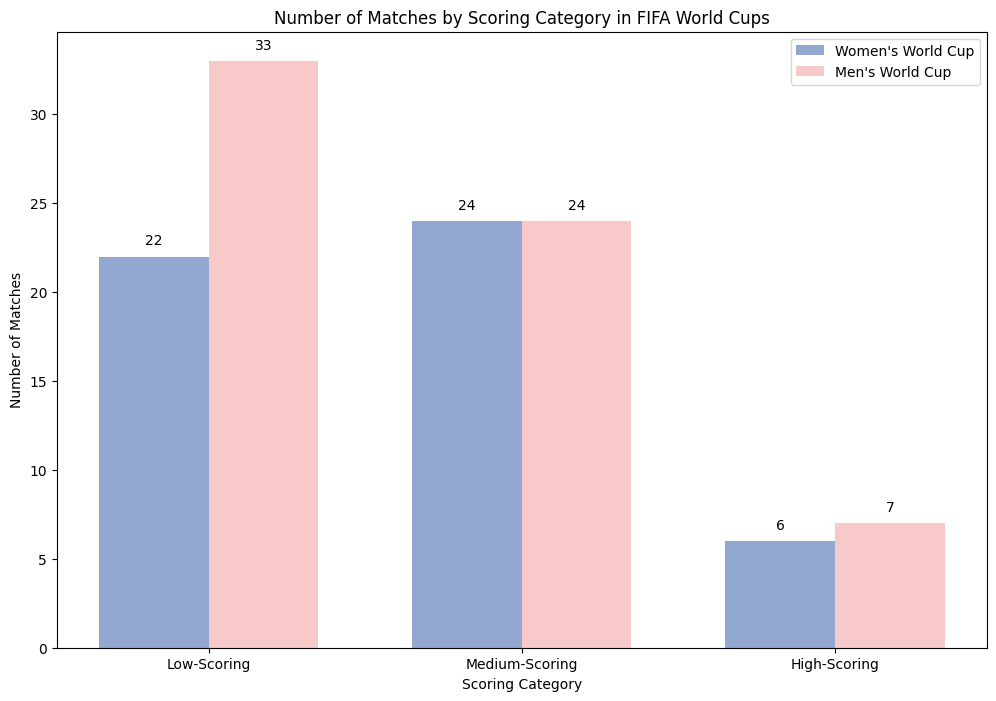

In [15]:
import numpy as np

# data preparation
categories = ['Low-Scoring', 'Medium-Scoring', 'High-Scoring']
women_counts = summary_stats_women['number_of_matches'].reindex(categories)
men_counts = summary_stats_men['number_of_matches'].reindex(categories)

# setting the positions and width for the bars
pos = np.arange(len(categories))
bar_width = 0.35

# creating the bar graph
plt.figure(figsize=(12, 8))

bar1 = plt.bar(pos - bar_width/2, women_counts, bar_width, label='Women\'s World Cup', color='#92a8d1')
bar2 = plt.bar(pos + bar_width/2, men_counts, bar_width, label='Men\'s World Cup', color='#f7cac9')

# adding labels & title
plt.xlabel('Scoring Category')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Scoring Category in FIFA World Cups')
plt.xticks(pos, categories)
plt.legend()

# adding the numerical values on top of the bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval), ha='center', va='bottom')

# showing the plot
plt.show()


### 3. Comparing Men's and Women's Woldcup scroring patterns in different stages of the tournament.

In [16]:
women_wc_flat['competition_stage.name'].replace({'Regular Season': 'Group Stage'}, inplace=True) 
# renaming 'Regular Season' to 'Group Stage'

women_stage_stats = women_wc_flat.groupby('competition_stage.name').agg({      # aggregating data by competition stage for the Women's World Cup dataset
    'home_score': 'mean',  # Calculate the average home score for each stage
    'away_score': 'mean',  # Calculate the average away score for each stage
    'match_id': 'count'    # Count the number of matches in each stage
}).rename(columns={'match_id': 'number_of_matches'})  

men_stage_stats = men_wc_flat.groupby('competition_stage.name').agg({
    'home_score': 'mean',  # Calculate the average home score for each stage    # aggregating data by competition stage for the Men's World Cup dataset
    'away_score': 'mean',  # Calculate the average away score for each stage
    'match_id': 'count'    # Count the number of matches in each stage
}).rename(columns={'match_id': 'number_of_matches'}) 

common_stages = women_stage_stats.index.intersection(men_stage_stats.index)
# identifying common competition stages between Women's and Men's World Cups


comparison = pd.concat([women_stage_stats.loc[common_stages], men_stage_stats.loc[common_stages]], 
                       axis=1, keys=['Women', 'Men']) # comparing the aggregated metrics across these common stages

print(comparison) # printing the comparative analysis

comparison.to_csv('Scoring patterns comparison in different stages.csv')

print("Data saved to 'Scoring patterns comparison in different stages .csv'")

                            Women                                     Men  \
                       home_score away_score number_of_matches home_score   
competition_stage.name                                                      
3rd Place Final             1.000      2.000                 1   2.000000   
Final                       2.000      0.000                 1   4.000000   
Group Stage                 1.650      1.275                40   1.333333   
Round of 16                 1.875      0.625                 8   1.875000   
Semi-finals                 1.000      1.000                 2   1.500000   

                                                     
                       away_score number_of_matches  
competition_stage.name                               
3rd Place Final          0.000000                 1  
Final                    2.000000                 1  
Group Stage              1.208333                48  
Round of 16              1.125000                 8  
Semi-

In [17]:
# defining a function to print the comparison in a formatted table
def print_formatted_comparison(comparison):
    print("Competition Stage | Metrics                | Women's World Cup | Men's World Cup")
    print("--------------------------------------------------------------------------------------------")
    for stage in comparison.index:
        # For each stage, print the average home goals, average away goals, and number of matches
        print(f"{stage:<17} | Average Home Goals     | {comparison.loc[stage, ('Women', 'home_score')]:<17} | {comparison.loc[stage, ('Men', 'home_score')]:<17}")
        print(f"{' ':<17} | Average Away Goals     | {comparison.loc[stage, ('Women', 'away_score')]:<17} | {comparison.loc[stage, ('Men', 'away_score')]:<17}")
        print(f"{' ':<17} | Number of Matches      | {comparison.loc[stage, ('Women', 'number_of_matches')]:<17} | {comparison.loc[stage, ('Men', 'number_of_matches')]:<17}")
        print("--------------------------------------------------------------------------------------------")


print_formatted_comparison(comparison) # calling the function with your comparison DataFrame


Competition Stage | Metrics                | Women's World Cup | Men's World Cup
--------------------------------------------------------------------------------------------
3rd Place Final   | Average Home Goals     | 1.0               | 2.0              
                  | Average Away Goals     | 2.0               | 0.0              
                  | Number of Matches      | 1                 | 1                
--------------------------------------------------------------------------------------------
Final             | Average Home Goals     | 2.0               | 4.0              
                  | Average Away Goals     | 0.0               | 2.0              
                  | Number of Matches      | 1                 | 1                
--------------------------------------------------------------------------------------------
Group Stage       | Average Home Goals     | 1.65              | 1.3333333333333333
                  | Average Away Goals     | 1.275        

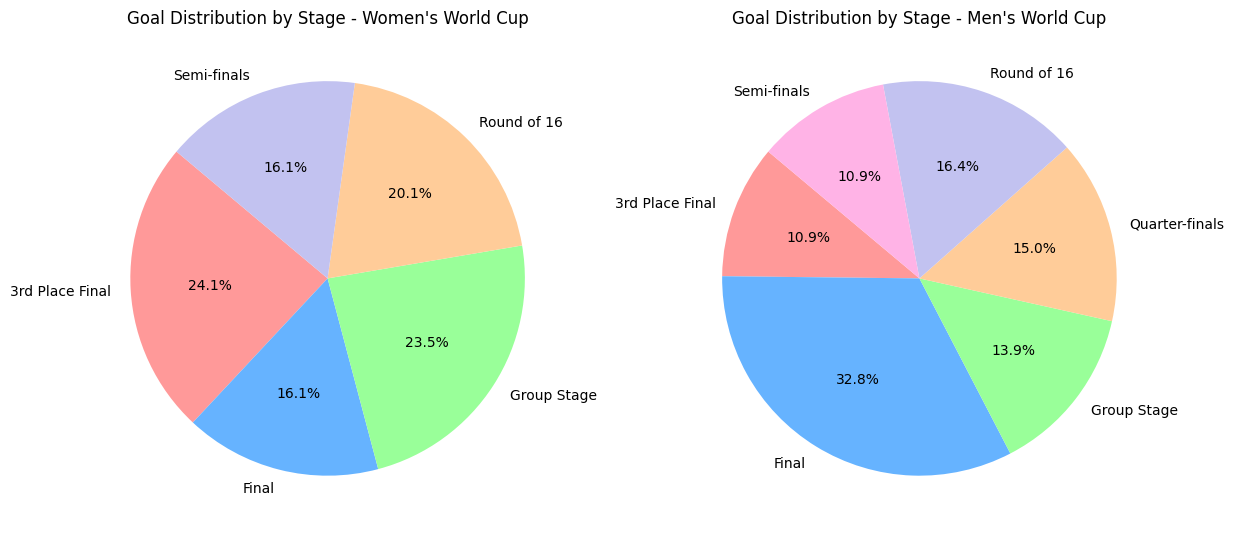

In [18]:
# calculating the total goals scored in each stage for Women's and Men's World Cups
total_goals_women = women_stage_stats['home_score'] + women_stage_stats['away_score']
total_goals_men = men_stage_stats['home_score'] + men_stage_stats['away_score']

# defining a color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6']

# creating subplots for the two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# pie chart for Women's WC
ax1.pie(total_goals_women, labels=total_goals_women.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Goal Distribution by Stage - Women\'s World Cup')

# pie chart for Men's WC
ax2.pie(total_goals_men, labels=total_goals_men.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax2.set_title('Goal Distribution by Stage - Men\'s World Cup')

# showing the plot
plt.show()


### 4. Complete Comparative Analysis of Women's and Men's World Cup

In [19]:
# creating a function for detailed analysis.
def detailed_analysis(df):
    # here we are considering team performance as number of goals scored by each team
    goals_by_team = df.groupby('home_team.home_team_name')['home_score'].sum() + df.groupby('away_team.away_team_name')['away_score'].sum()

    def match_result(home_goals, away_goals):
        if home_goals > away_goals:
            return 'Win'
        elif home_goals < away_goals:
            return 'Loss'
        else:
            return 'Draw'

    df['home_result'] = df.apply(lambda x: match_result(x['home_score'], x['away_score']), axis=1)
    df['away_result'] = df.apply(lambda x: match_result(x['away_score'], x['home_score']), axis=1)
    outcomes_home = df.groupby('home_team.home_team_name')['home_result'].value_counts()
    outcomes_away = df.groupby('away_team.away_team_name')['away_result'].value_counts()

    # match distribution by day of the week
    df['match_date'] = pd.to_datetime(df['match_date'])
    matches_by_day = df['match_date'].dt.day_name().value_counts()

    return {
        'goals_by_team': goals_by_team,
        'outcomes_home': outcomes_home,
        'outcomes_away': outcomes_away,
        'matches_by_day': matches_by_day
    }

# analysis for Women's world Cup
women_analysis = detailed_analysis(women_wc_flat)

# analysis for Men's world Cup
men_analysis = detailed_analysis(men_wc_flat)

# function to display analysis results
def display_analysis_results(analysis, title):
    print(f"--- {title} ---\n")

    print("Goals by Team:")
    print(analysis['goals_by_team'].sort_values(ascending=False).head(10).to_string(), "\n")  # Display top 10 teams

    print("Match Outcomes (Home Teams):")
    print(analysis['outcomes_home'].unstack().fillna(0).astype(int).head(10).to_string(), "\n")  # Display top 10 teams

    print("Match Outcomes (Away Teams):")
    print(analysis['outcomes_away'].unstack().fillna(0).astype(int).head(10).to_string(), "\n")  # Display top 10 teams

    print("Matches by Day of the Week:")
    print(analysis['matches_by_day'].to_string(), "\n")

# printing results.
display_analysis_results(women_analysis, "Women's World Cup Analysis")
display_analysis_results(men_analysis, "Men's World Cup Analysis")

--- Women's World Cup Analysis ---

Goals by Team:
home_team.home_team_name
United States Women's    26
England Women's          13
Sweden Women's           12
Netherlands Women's      11
France Women's           10
Germany Women's          10
Italy Women's             9
Australia Women's         9
Brazil Women's            7
Norway Women's            7 

Match Outcomes (Home Teams):
home_result               Draw  Loss  Win
home_team.home_team_name                 
Argentina Women's            1     0    0
Australia Women's            0     1    1
Brazil Women's               0     0    1
Cameroon Women's             0     0    1
Canada Women's               0     0    2
Chile Women's                0     1    0
China PR Women's             1     0    0
England Women's              0     2    3
France Women's               0     1    3
Germany Women's              0     1    3 

Match Outcomes (Away Teams):
away_result               Draw  Loss  Win
away_team.away_team_name            

### OUTPUT TO CSV

In [20]:
women_goals_df = women_analysis['goals_by_team'].sort_values(ascending=False).reset_index().head(10)
women_home_outcomes_df = women_analysis['outcomes_home'].unstack().fillna(0).astype(int).reset_index().head(10)
women_away_outcomes_df = women_analysis['outcomes_away'].unstack().fillna(0).astype(int).reset_index().head(10)
women_matches_by_day_df = women_analysis['matches_by_day'].reset_index()

men_goals_df = men_analysis['goals_by_team'].sort_values(ascending=False).reset_index().head(10)
men_home_outcomes_df = men_analysis['outcomes_home'].unstack().fillna(0).astype(int).reset_index().head(10)
men_away_outcomes_df = men_analysis['outcomes_away'].unstack().fillna(0).astype(int).reset_index().head(10)
men_matches_by_day_df = men_analysis['matches_by_day'].reset_index()

# combining all parts into a single DF
Complete_comparitive_analysis_csv = pd.concat([
    women_goals_df, women_home_outcomes_df, women_away_outcomes_df, women_matches_by_day_df,
    men_goals_df, men_home_outcomes_df, men_away_outcomes_df, men_matches_by_day_df
], axis=1)

# renaming columns for clarity
Complete_comparitive_analysis_csv.columns = [
    'Women_Team', 'Women_Total_Goals', 'Women_Home_Team', 'Women_Home_Draws', 
    'Women_Home_Losses', 'Women_Home_Wins', 'Women_Away_Team', 'Women_Away_Draws', 
    'Women_Away_Losses', 'Women_Away_Wins', 'Women_Match_Day', 'Women_Matches_Count',
    'Men_Team', 'Men_Total_Goals', 'Men_Home_Team', 'Men_Home_Draws', 
    'Men_Home_Losses', 'Men_Home_Wins', 'Men_Away_Team', 'Men_Away_Draws', 
    'Men_Away_Losses', 'Men_Away_Wins', 'Men_Match_Day', 'Men_Matches_Count'
]

# saving the DF to a CSV file
Complete_comparitive_analysis_csv.to_csv('Complete_comparitive_analysis.csv', index=False)



### Graphing

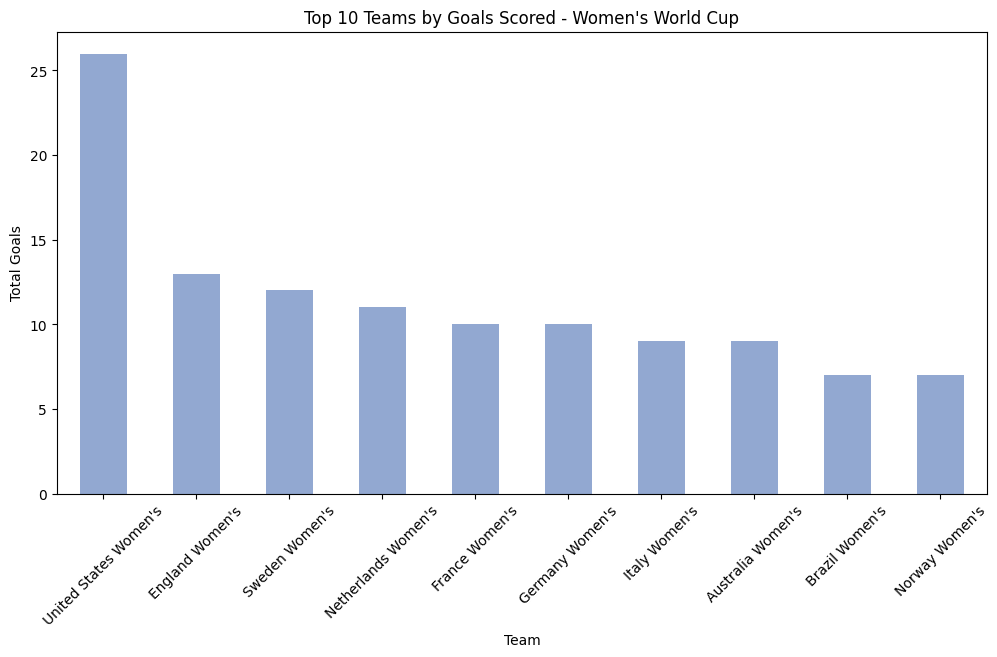

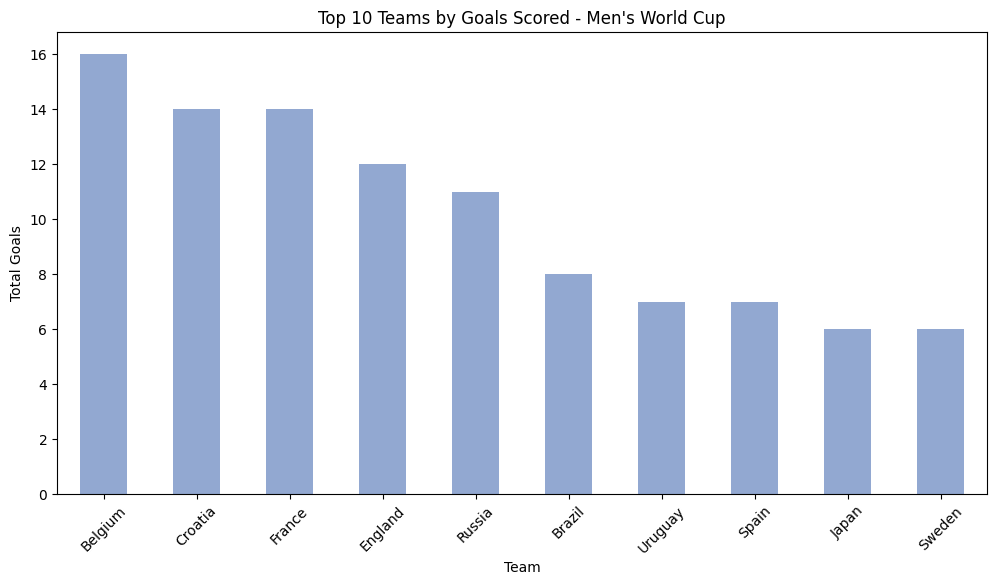

In [21]:
# data for top teams' goals
top_teams_goals_women = women_analysis['goals_by_team'].sort_values(ascending=False).head(10)
top_teams_goals_men = men_analysis['goals_by_team'].sort_values(ascending=False).head(10)

# creating bar graph for Women WC
plt.figure(figsize=(12, 6))
top_teams_goals_women.plot(kind='bar', color='#92a8d1')
plt.title("Top 10 Teams by Goals Scored - Women's World Cup")
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()

# creating bar graph for Men's WC
plt.figure(figsize=(12, 6))
top_teams_goals_men.plot(kind='bar', color='#92a8d1')
plt.title("Top 10 Teams by Goals Scored - Men's World Cup")
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()


### 